In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
#Scaling
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
y=df['species']

In [6]:
y=le.fit_transform(y)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))

In [9]:
X=df.drop('species',axis=1)

In [12]:
X=scaler.fit_transform(X)

In [13]:
X=pd.DataFrame(X)

In [14]:
X.columns=df.columns[:4]

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [16]:
#K means
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)

In [17]:
kmeans.fit(X)
predicted_cluster=kmeans.fit_predict(X)

In [20]:
C_data=df.copy()

In [21]:
C_data['Clusters']=predicted_cluster

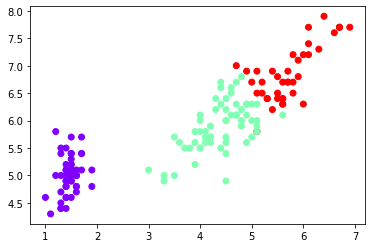

In [24]:
plt.scatter(C_data['petal_length'],C_data['sepal_length'],c=C_data['Clusters'],cmap='rainbow')

In [27]:
wcss=[]
for i in range(1,15):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'WCSS')

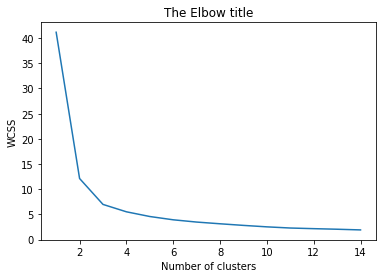

In [28]:
number_clusters = range(1,15)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')